In [9]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re
import tweepy

To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [10]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [11]:
dest_path = 'data/2017-2018.json'
trump_tweets = load_tweets(dest_path)


Find the number of the month of the oldest tweet.

In [12]:
oldest_month = 10 #October # Enter answer here and code below this


trump_tweets = pd.DataFrame(trump_tweets)


last_tweet = trump_tweets.loc[3213,'created_at']
monthsDict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}

oldest_month = monthsDict[last_tweet[4:7]]

In [13]:
dest_path_old = 'data/2016-2017.json'
trump_tweets_old = load_tweets(dest_path_old)
trump_tweets_old = pd.DataFrame(trump_tweets_old)

trump_tweets_old.loc[:, 'id'] = trump_tweets_old['id'].astype('int64')
trump_tweets.loc[:, 'id'] = trump_tweets['id'].astype('int64')

merged_frame = pd.concat([trump_tweets_old, trump_tweets]).drop_duplicates("id")
all_tweets = merged_frame


In [14]:
df_trump = pd.DataFrame(columns=["id", "time", "source", "text", "retweet_count"])
df_trump['id'] = all_tweets['id']
df_trump['source'] = all_tweets['source']
df_trump['retweet_count'] = all_tweets['retweet_count']

df_trump['time'] = pd.to_datetime(all_tweets['created_at'], format ="%a %b %d %H:%M:%S %z %Y")

texts = []

for idx in range(len(all_tweets)):
    
    if pd.isna(all_tweets['text'].iloc[idx]):
        
        texts.append(all_tweets['full_text'].iloc[idx])
    else:
        texts.append(all_tweets['text'].iloc[idx])

df_trump['text'] = texts
df_trump = df_trump.set_index('id')

df_trump

,time,source,text,retweet_count
id,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428
...,...,...,...,...
948194400114487296,2018-01-02 14:08:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Sanctions and “other” pressures are beginning to have a big impact on North Korea. Soldiers are dangerously fleeing to South Korea. Rocket man now wants to talk to South Korea for first time. Perhaps that is good news, perhaps not - we will see!",16156
948189482284707840,2018-01-02 13:49:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Companies are giving big bonuses to their workers because of the Tax Cut Bill. Really great!,14513
948188264858603520,2018-01-02 13:44:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thank you to Brandon Judd of the National Border Patrol Council for your kind words on how well we are doing at the Border. We will be bringing in more &amp; more of your great folks and will build the desperately needed WALL! @foxandfriends,13465


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [15]:
df_trump['source'].unique()

array(['Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [16]:
import re

expression = re.compile("<[^>]*>")

df_trump['source'] = df_trump["source"].str.replace(expression, ' ')

df_trump


,time,source,text,retweet_count
id,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428
...,...,...,...,...
948194400114487296,2018-01-02 14:08:56+00:00,Twitter for iPhone,"Sanctions and “other” pressures are beginning to have a big impact on North Korea. Soldiers are dangerously fleeing to South Korea. Rocket man now wants to talk to South Korea for first time. Perhaps that is good news, perhaps not - we will see!",16156
948189482284707840,2018-01-02 13:49:23+00:00,Twitter for iPhone,Companies are giving big bonuses to their workers because of the Tax Cut Bill. Really great!,14513
948188264858603520,2018-01-02 13:44:33+00:00,Twitter for iPhone,Thank you to Brandon Judd of the National Border Patrol Council for your kind words on how well we are doing at the Border. We will be bringing in more &amp; more of your great folks and will build the desperately needed WALL! @foxandfriends,13465


### Make a plot to find out the most common device types used in accessing twitter

Sort the plot in decreasing order of the most common device type

[Text(0.5, 0, 'Source'), Text(0, 0.5, 'Count')]

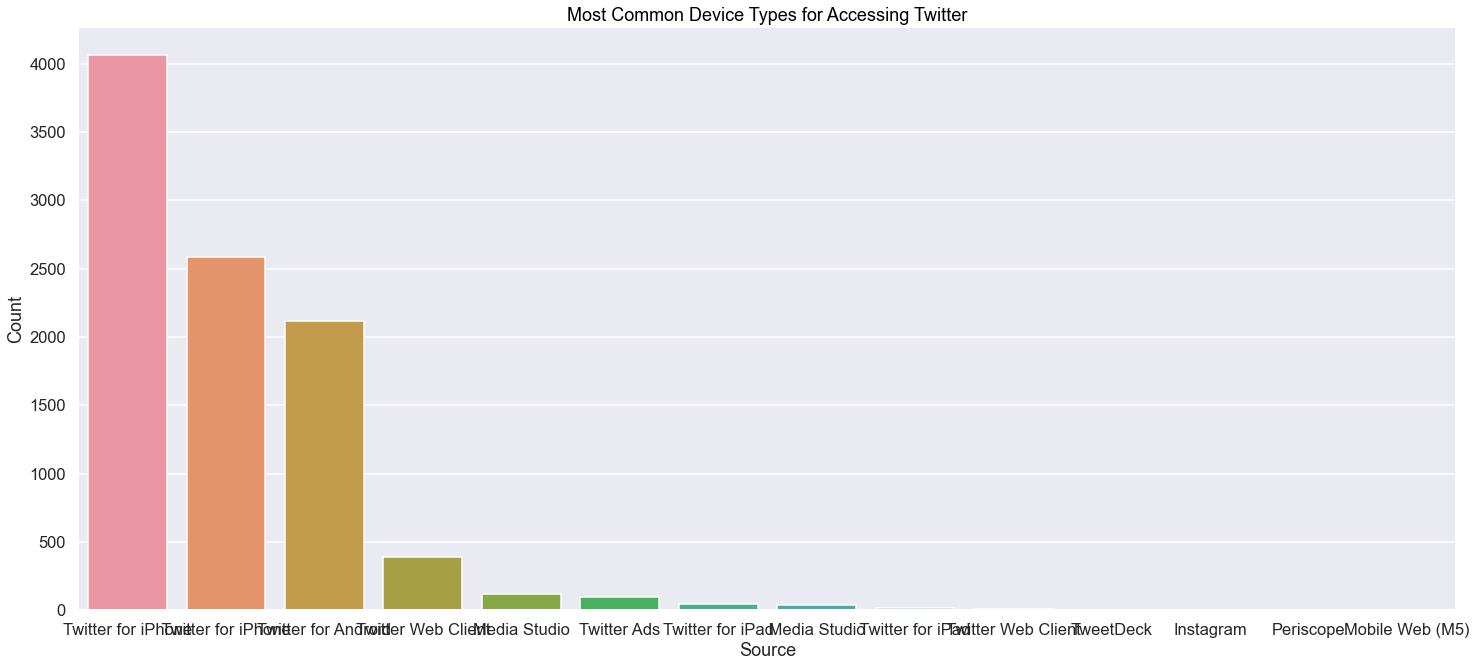

In [17]:
plt.figure(figsize = (22,10))
plt.title("Most Common Device Types for Accessing Twitter" , c = "black")

temp = df_trump["source"].value_counts(ascending = False).index

ax = sns.countplot(data = df_trump, x = "source", order = temp)
ax.set(xlabel = "Source" , ylabel = "Count")


Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)


In [18]:
df_trump['time'][0:3]

id
947824196909961216   2018-01-01 13:37:52+00:00
947810806430826496   2018-01-01 12:44:40+00:00
947802588174577664   2018-01-01 12:12:00+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [19]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237,2018-01-01 08:37:52-05:00
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595,2018-01-01 07:44:40-05:00
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566,2018-01-01 07:12:00-05:00
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164,2017-12-31 18:43:04-05:00
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428,2017-12-31 17:18:20-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [20]:
df_trump['hour'] = (df_trump['est_time'].dt.hour) + (df_trump['est_time'].dt.minute / 60) + (df_trump['est_time'].dt.second / (60**2))

df_trump['roundhour']=round(df_trump['hour'])

In [21]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)


[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Count')]

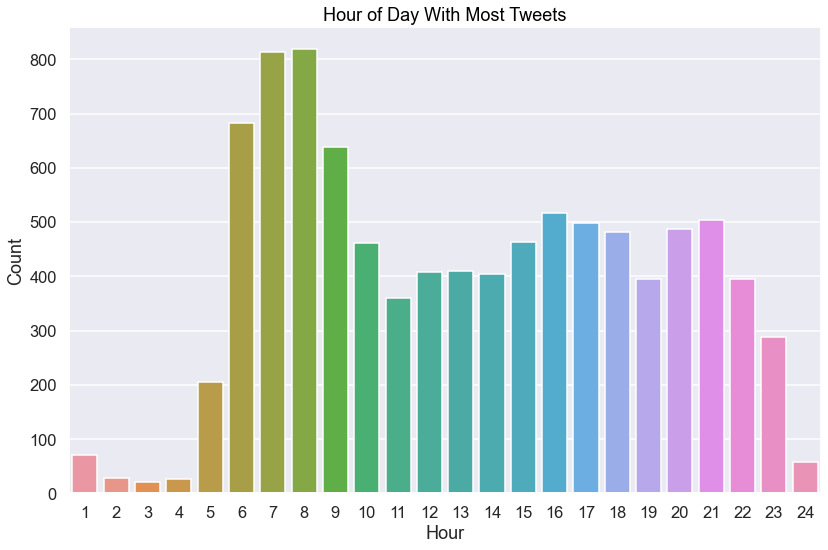

In [22]:
plt.figure(figsize = (12,8))
plt.title("Hour of Day With Most Tweets" , c = "black")

ax = sns.countplot(data = df_trump, x = "roundhour", order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
ax.set(xlabel = "Hour" , ylabel = "Count")



Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 


/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Fraction')

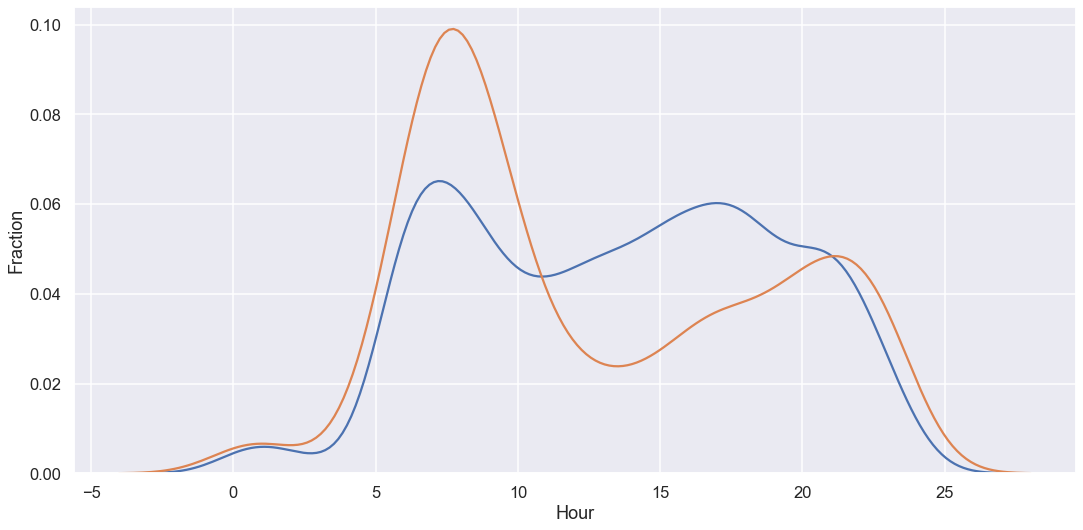

In [23]:


plt.figure(figsize = (16,8))
distplot_iphone = sns.distplot(df_trump[df_trump['source'] == 'Twitter for iPhone']['roundhour'] , kde = True , rug = False , hist = False)
distplot_android = sns.distplot(df_trump[df_trump['source'] == 'Twitter for Android']['roundhour'] , kde = True , rug = False , hist = False)

plt.xlabel("Hour")
plt.ylabel("Fraction")



According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Hour')

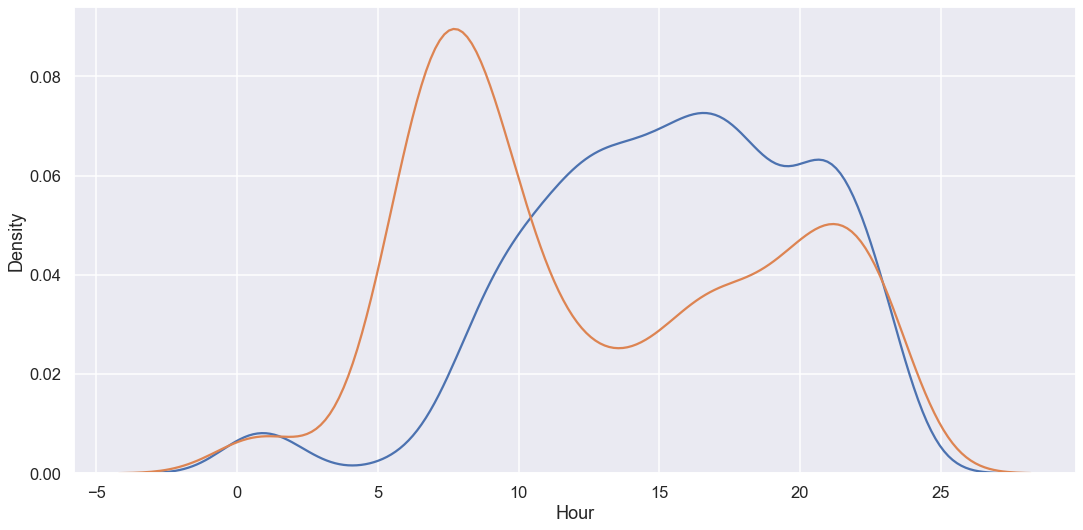

In [24]:

plt.figure(figsize = (16,8))

iphone_2016 = df_trump[(df_trump['est_time'].dt.year == 2016) & (df_trump['source'] == 'Twitter for iPhone')]['roundhour']
android_2016 = df_trump[(df_trump['est_time'].dt.year == 2016) & (df_trump['source'] == 'Twitter for Android')]['roundhour']

distplot_iphone = sns.distplot(iphone_2016 , kde = True , rug = False , hist = False)
distplot_android = sns.distplot(android_2016 , kde = True , rug = False , hist = False)

plt.xlabel("Hour")



Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [26]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![source_years.png](attachment:source_years.png)

/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Year')

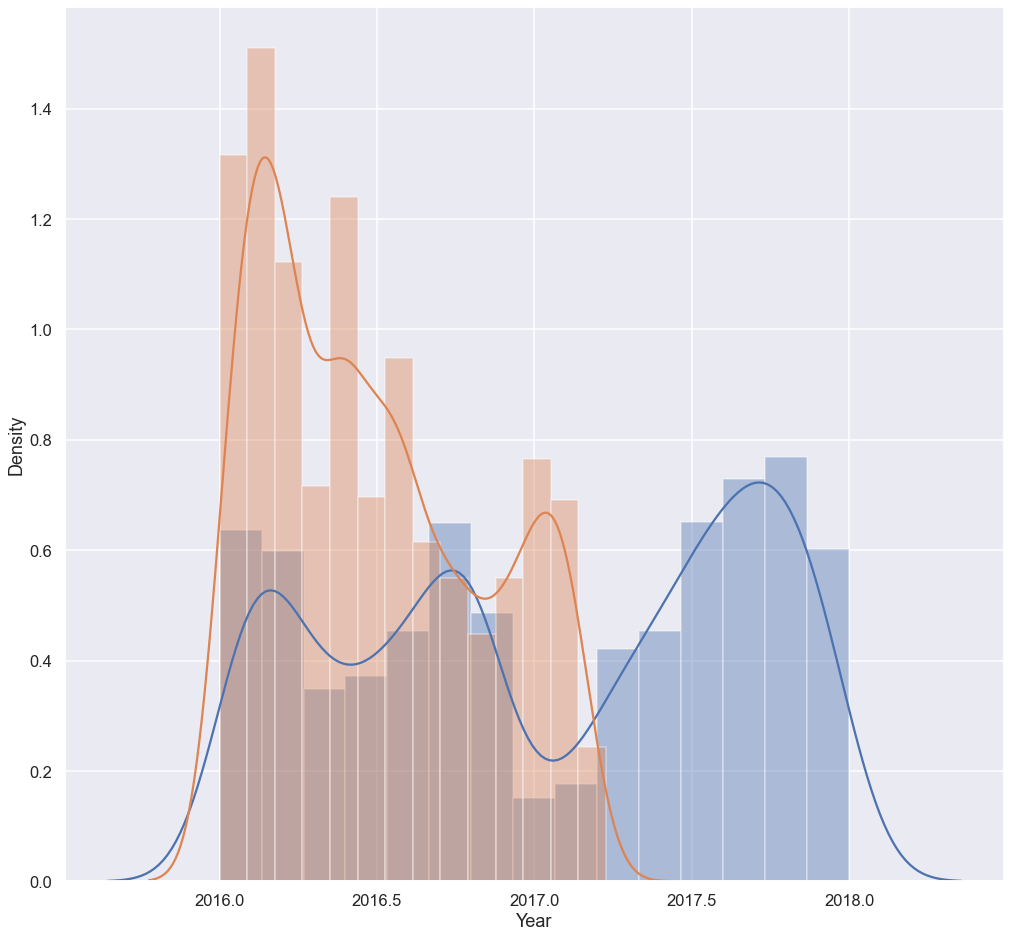

In [27]:

plt.figure(figsize = (15,15))
distplot_iphone = sns.distplot(df_trump[df_trump['source'] == 'Twitter for iPhone']['year'] , kde = True , rug = False , hist = True)
distplot_android = sns.distplot(df_trump[df_trump['source'] == 'Twitter for Android']['year'] , kde = True , rug = False , hist = True)

plt.xlabel("Year")


It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [28]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [1100]:

df_sent = pd.read_csv('data/vader_lexicon.txt', sep="\t" , names = ['token','polarity','temp1','temp2'])
df_sent = df_sent[{'token' , 'polarity'}]
df_sent = df_sent.set_index('token')

df_sent


,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4



Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [1101]:


df_trump["text"] = df_trump['text'].str.lower()

df_trump


,time,source,text,retweet_count,est_time,hour,roundhour,year
id,,,,,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"will be leaving florida for washington (d.c.) today at 4:00 p.m. much work to be done, but it will be a great new year!",8237,2018-01-01 08:37:52-05:00,8.631111,9.0,2018.00000
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"iran is failing at every level despite the terrible deal made with them by the obama administration. the great iranian people have been repressed for many years. they are hungry for food &amp; for freedom. along with human rights, the wealth of iran is being looted. time for ...",14595,2018-01-01 07:44:40-05:00,7.744444,8.0,2018.00000
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"the united states has foolishly given pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. they give safe haven to the terrorists we hunt in afghanistan, with little help. ...",49566,2018-01-01 07:12:00-05:00,7.200000,7.0,2018.00000
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"happy new year! we are making america great again, and much faster than anyone thought possible!",35164,2017-12-31 18:43:04-05:00,18.717778,19.0,2017.99726
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!",39428,2017-12-31 17:18:20-05:00,17.305556,17.0,2017.99726
...,...,...,...,...,...,...,...,...
948194400114487296,2018-01-02 14:08:56+00:00,Twitter for iPhone,"sanctions and “other” pressures are beginning to have a big impact on north korea. soldiers are dangerously fleeing to south korea. rocket man now wants to talk to south korea for first time. perhaps that is good news, perhaps not - we will see!",16156,2018-01-02 09:08:56-05:00,9.148889,9.0,2018.00274
948189482284707840,2018-01-02 13:49:23+00:00,Twitter for iPhone,companies are giving big bonuses to their workers because of the tax cut bill. really great!,14513,2018-01-02 08:49:23-05:00,8.823056,9.0,2018.00274
948188264858603520,2018-01-02 13:44:33+00:00,Twitter for iPhone,thank you to brandon judd of the national border patrol council for your kind words on how well we are doing at the border. we will be bringing in more &amp; more of your great folks and will build the desperately needed wall! @foxandfriends,13465,2018-01-02 08:44:33-05:00,8.742500,9.0,2018.00274




Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.


In [1102]:

punct_re = r'[^\w\s\\n]'

df_trump['no_punc'] = df_trump['text'].str.replace(punct_re,' ')


/Users/kush/work/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys



Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.


In [1104]:


tidy_format = df_trump['no_punc'].str.split(expand=True).stack().to_frame().reset_index().rename(columns = {'level_1' : 'num' , 0 : 'word'}).set_index('id')
tidy_format.head(10)



,num,word
id,,
947824196909961216,0,will
947824196909961216,1,be
947824196909961216,2,leaving
947824196909961216,3,florida
947824196909961216,4,for
947824196909961216,5,washington
947824196909961216,6,d
947824196909961216,7,c
947824196909961216,8,today


Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.



In [1106]:
temp = pd.merge(tidy_format, df_sent, left_on = 'word', right_index = True)

df_trump['polarity'] = temp['polarity'].groupby('id').sum()
df_trump['polarity'] = df_trump['polarity'].fillna(0)


Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [1110]:

print('Most negative tweets:')

df_sorted = df_trump.sort_values('polarity', ascending = True)
display(df_sorted['text'].head().reset_index())


Most negative tweets:


,id,text
0,1031590431379865600,"it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!"
1,1029731513573822464,"the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!"
2,984763579210633216,"james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a..."
3,1027585937163931648,"this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!"
4,1031508193107763200,"where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!"


In [1111]:


print('Most positive tweets:')

df_sorted = df_trump.sort_values('polarity', ascending = False)
display(df_sorted['text'].head().reset_index())

    


Most positive tweets:


,id,text
0,983143317889323008,"congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!"
1,1007974129474121728,"my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!"
2,973716838889660416,"it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we love you - and we will always have your back! https://t.co/oct1nh3don"
3,1016638035281219584,"thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!"
4,1014287566386888709,"thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless our veterans. god bless america - and happy independence day to all! https://t.co/v35qvcn8m6"


/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kush/work/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

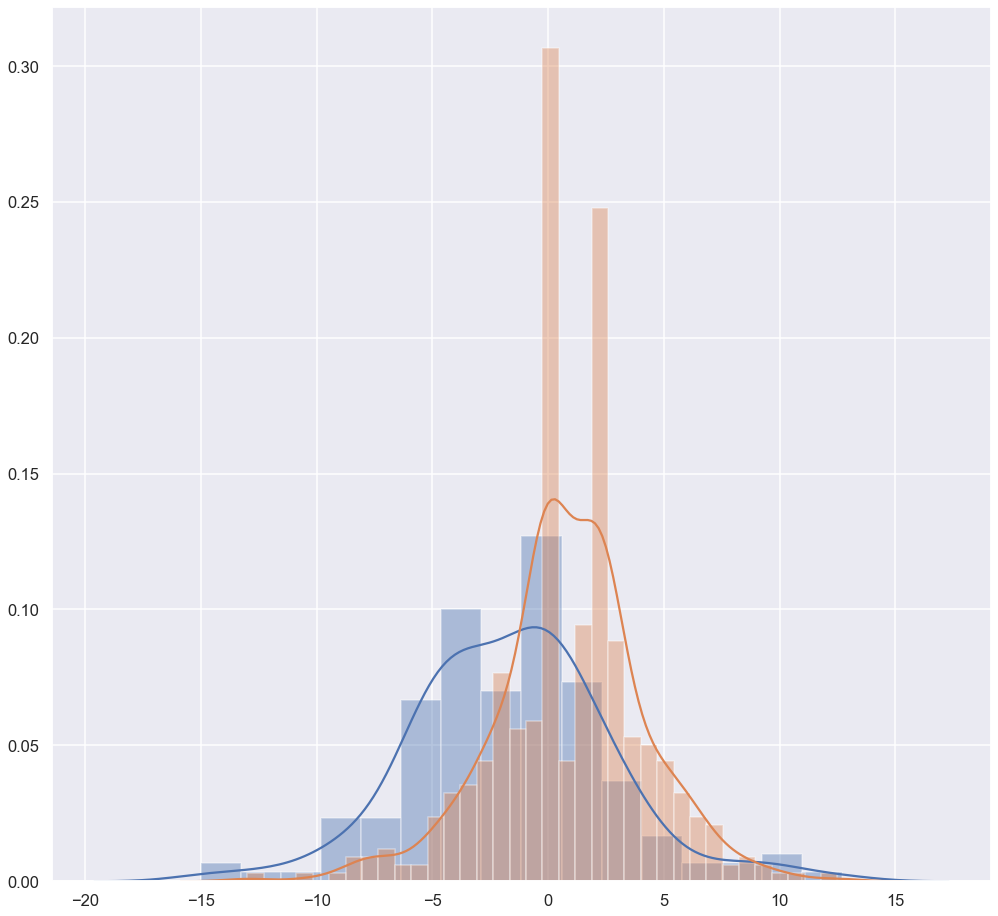

In [1112]:


plt.figure(figsize = (15,15))
distplot_nyt = sns.distplot(df_trump[df_trump['text'].str.contains("nyt")]['polarity'], kde = True , hist = True)
distplot_fox = sns.distplot(df_trump[df_trump['text'].str.contains("fox")]['polarity'], kde = True , hist = True)
plt.xlabel("")
plt.ylabel("")


Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [1117]:
import nltk
import nltk.corpus
import ssl

###############################################################

#Had to add try except statement becuase local server was not allowing nltk
#this fix was found on stackoverflow

###############################################################

from nltk.stem.wordnet import WordNetLemmatizer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

#create a dataframe called tmp to store all words appear in the tweets

tmp = tidy_format.copy()

#remove stopwords

stopwords = nltk.corpus.stopwords.words('English')
stopwords.extend(['rt','t','co','https','realdonaldtrump','amp',"u",'hillary','trump2016','trump','clinton','http','ha','wa'])
tmp = tmp[~tmp['word'].isin(stopwords)]

#deal with plurals

lemmatizer = WordNetLemmatizer() 
tmp['word'] = tmp['word'].apply(lambda x: lemmatizer.lemmatize(x))

# Remove numbers

tmp= tmp[~(tmp['word'].str.isnumeric())]

#Remove words with only 1 or 2 length

tmp["true"] = tmp['word'].apply(lambda x : len(x) > 2)

tmp = tmp[tmp['true'] == True]

tmp = tmp.drop('true' , axis = 1)


#*********code that was given in recitation*********#

words = tmp['word'].value_counts(ascending = False)

words = words.reset_index()['index'][:50].to_list()

w_to_idx = {}
for i in range(len(words)):
    w_to_idx[words[i]] = i
    
X = np.zeros((1000, 50))


selected_tweets = tmp.index.unique()[:1000]

for i in range(1000):
    df_clean_i = tmp.loc[[selected_tweets[i]]]
    for j in range(len(df_clean_i)):
        
        if df_clean_i.iloc[j]['word'] in words:
            X[i, w_to_idx[df_clean_i.iloc[j]['word']]] += 1
print(X[:10])

### END SOLUTION


[nltk_data] Downloading package omw-1.4 to /Users/kush/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kush/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 1. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0.

Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [1065]:
#*********code that was given in recitation*********#

mu = X.mean(axis = 0)

X_ = X - mu

Sigma = X_.T @ X_ / len(X_)

import scipy.linalg as linalg
u, lam, uh = linalg.svd(Sigma)

print(u[:,0].T @ X_[0,:])
print(u[:,0])


-0.699327777359189
[-9.01241823e-01 -8.25374649e-03 -1.48837743e-03 -2.02346507e-01
  4.40100698e-02 -6.70681937e-02 -8.56579936e-02 -7.22132321e-02
 -4.69864415e-02 -1.41850492e-01 -6.63353929e-04 -5.26228769e-02
 -2.29687175e-02  1.28807683e-01 -3.47920897e-03  4.73029905e-03
  1.34468919e-03 -4.46140472e-02 -3.90875121e-02 -1.03358598e-02
 -3.66436035e-02 -1.95961117e-02  1.11667192e-01 -2.28312123e-01
 -1.97503570e-04  1.71284195e-02 -5.49964291e-02  3.21644985e-02
  5.70752425e-03  3.04931577e-02 -1.25223422e-02  1.20654688e-02
 -6.41125626e-03 -4.97970395e-02 -2.51924538e-02 -1.86651341e-03
  1.67814281e-02 -4.40963300e-02 -2.13076625e-04  5.38325073e-03
 -1.82602736e-02  1.39233983e-02 -5.08838506e-03  1.77644450e-04
  9.03743406e-03  2.22911377e-03 -5.86908757e-02 -1.05232848e-03
  1.81608365e-02 -1.06188610e-02]


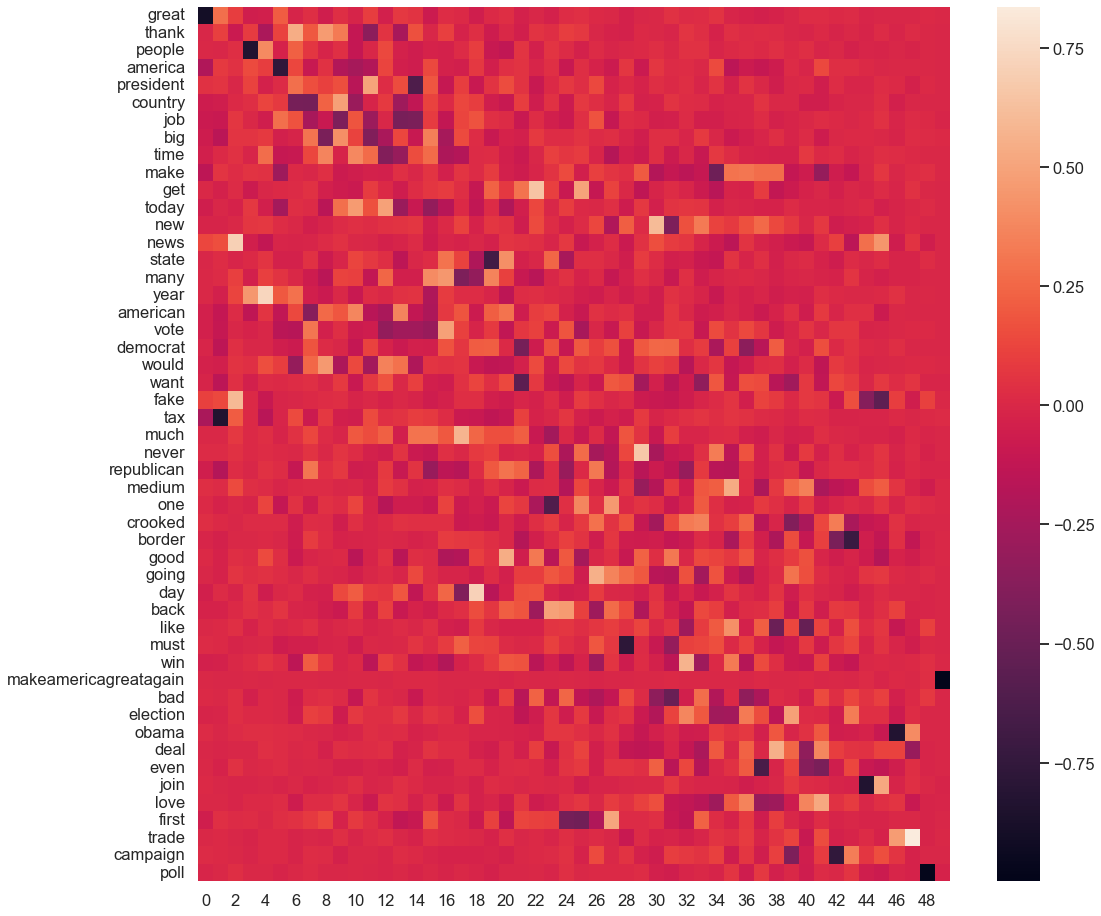

In [1066]:

#*********code that was given in recitation*********#

joint_plot_df = pd.DataFrame(u)
rename_dict = {}
for i in range(50):
    rename_dict[i] = words[i]
joint_plot_df = joint_plot_df.rename(index = rename_dict)
joint_plot_df

plt.figure(figsize = (15,15))

ax = sns.heatmap(joint_plot_df)


In this problem, we'll explore which words led to a greater average number of retweets.

Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [1115]:
#top_20 = ...
### BEGIN SOLUTION

def f(column):
    return len(column) >= 25

top_20 = tidy_format.groupby("word").filter(f)

top_20 = pd.merge(top_20 , df_trump , right_index = True, left_on = 'id')

top_20 = top_20.groupby('word').mean().sort_values('retweet_count' , ascending=False).reset_index()
top_20 = top_20[{'word' , 'retweet_count'}]
display(top_20.head(5))
### END SOLUTION

,retweet_count,word
0,40408.666667,jong
1,32569.365854,un
2,32148.081633,kim
3,30622.000000,maybe
4,29109.862069,try


Plot a bar chart of your results:

<BarContainer object of 20 artists>

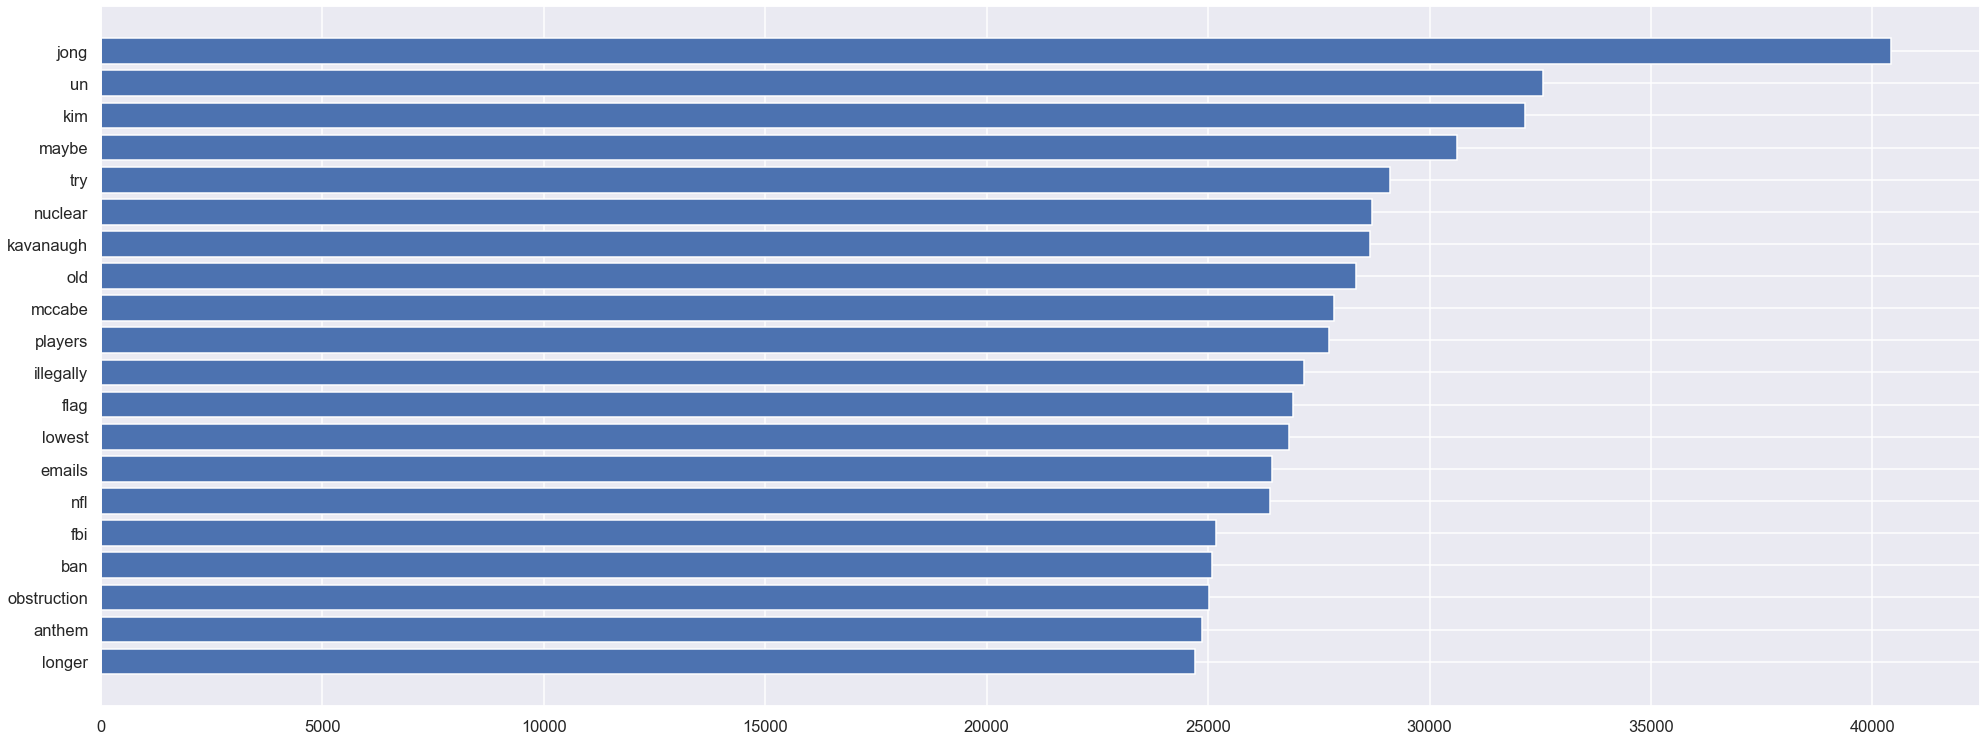

In [1116]:
### BEGIN SOLUTION

plt.figure(figsize = (30,12))

t1 = top_20['word'].head(20).to_list()
t2 = top_20['retweet_count'].head(20).to_list()

plt.barh(t1[::-1] , t2[::-1])

### BEGIN SOLUTION